# We will start by using TF-IDF tutorial on new dataset
## Data collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

df=pd.read_csv('train_data.txt',sep=' ::: ', engine='python', names=['ID', 'Title', 'Genre', 'Description'])
df.head(4)

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...


## Data pre-proccesing

In [2]:
df1 = df.sample(10000, random_state=1).copy()

In [3]:
df2 = df1[['Genre', 'Description']].copy()

pd.DataFrame(df2.Genre.unique())
df2.Genre.value_counts()

Genre
drama          2589
documentary    2378
comedy         1396
short           940
horror          397
thriller        276
action          239
western         184
family          158
reality-tv      156
adventure       135
romance         135
sci-fi          128
adult           113
music           110
crime            91
talk-show        83
animation        79
sport            77
fantasy          59
history          56
mystery          51
musical          46
biography        41
news             33
game-show        30
war              20
Name: count, dtype: int64

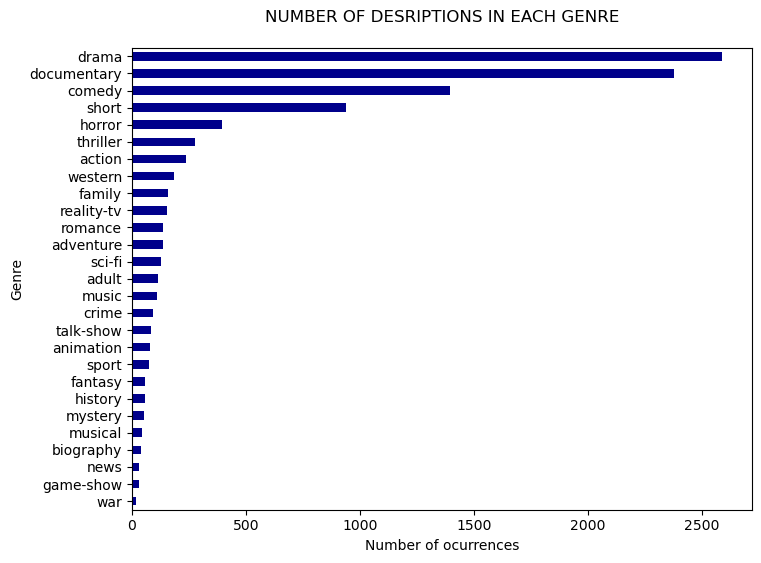

In [4]:
fig = plt.figure(figsize=(8,6))
colors = ['darkblue']
df2.groupby('Genre').Description.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF DESRIPTIONS IN EACH GENRE\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [5]:
df2['genre_id'] = df2['Genre'].factorize()[0]
genre_id_df = df2[['Genre', 'genre_id']].drop_duplicates()

genre_to_id = dict(genre_id_df.values)
id_to_genre = dict(genre_id_df[['genre_id', 'Genre']].values)
df2.head()

,Genre,Description,genre_id
10689,documentary,This documentary film is a heartfelt glimpse a...,0
32392,short,"According to an old Chinese fairytale, the god...",1
47445,short,"In 1929, in Chicago, 12 year old Larry Adler w...",1
11729,adventure,England Cricket hero Freddie Flintoff spends e...,2
1298,documentary,Three gravediggers lovingly maintain the peace...,0


In [6]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

features = tfidf.fit_transform(df2.Description).toarray()

labels = df2.genre_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 10000 complaints is represented by 15667 features (TF-IDF score of unigrams and bigrams)


## Division on training and test sets, trying different models

In [7]:
X = df2['Description'] 
y = df2['Genre'] 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state = 20)

In [8]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\svm\_clas

## Exploring results

In [9]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1,
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.5466,0.009711
LogisticRegression,0.5206,0.010121
MultinomialNB,0.4537,0.008892
RandomForestClassifier,0.4017,0.007759


In [10]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features,
                                                               labels,
                                                               df2.index, test_size=0.25,
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [11]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred,
                                    target_names= df2['Genre'].unique()))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

 documentary       0.63      0.84      0.72       592
       short       0.38      0.24      0.30       249
   adventure       0.22      0.09      0.13        22
       drama       0.52      0.72      0.60       623
      comedy       0.50      0.54      0.52       364
    thriller       0.26      0.14      0.18        57
      family       0.50      0.10      0.16        42
  reality-tv       0.55      0.18      0.27        33
       adult       0.69      0.33      0.45        27
      action       0.37      0.21      0.27        53
      horror       0.60      0.52      0.56       105
     mystery       0.00      0.00      0.00         9
     romance       0.50      0.03      0.06        34
       music       0.69      0.30      0.42        30
   animation       0.00      0.00      0.00        17
     western       1.00      0.68      0.81        57
     history       0.00      0.00      0.00        1

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


## Inference

In [13]:
new_description = "Katniss Everdeen voluntarily takes her younger sister's place in the Hunger Games: a televised competition in which two teenagers from each of the twelve Districts of Panem are chosen at random to fight to the death."
print(model.predict(fitted_vectorizer.transform([new_description])))

['action']


# Now we will try to finetune pretrained transformer (BERT) model on our dataset.

## Data pre-proccesing

In [14]:
df = df1[['Genre', 'Description']]
df

,Genre,Description
10689,documentary,This documentary film is a heartfelt glimpse a...
32392,short,"According to an old Chinese fairytale, the god..."
47445,short,"In 1929, in Chicago, 12 year old Larry Adler w..."
11729,adventure,England Cricket hero Freddie Flintoff spends e...
1298,documentary,Three gravediggers lovingly maintain the peace...
...,...,...
30998,horror,Misty Mundae (Erin Brown) and Daisy (Chelsea M...
48936,drama,Lumberjack Anthony Briggs has lived alone in t...
17076,drama,"After an eleven month relationship, Antonia, a..."
2491,documentary,"During the Second World War, as Canada was emb..."


In [15]:
labels = list(set(df["Genre"]))
labels

['short',
 'history',
 'talk-show',
 'music',
 'crime',
 'adventure',
 'thriller',
 'animation',
 'sci-fi',
 'documentary',
 'fantasy',
 'horror',
 'adult',
 'game-show',
 'biography',
 'romance',
 'sport',
 'war',
 'family',
 'action',
 'drama',
 'musical',
 'mystery',
 'news',
 'western',
 'comedy',
 'reality-tv']

In [16]:
id2label = {k:v for k,v in enumerate(labels)}
label2id = {v:k for k,v in enumerate(labels)}
label2id

{'short': 0,
 'history': 1,
 'talk-show': 2,
 'music': 3,
 'crime': 4,
 'adventure': 5,
 'thriller': 6,
 'animation': 7,
 'sci-fi': 8,
 'documentary': 9,
 'fantasy': 10,
 'horror': 11,
 'adult': 12,
 'game-show': 13,
 'biography': 14,
 'romance': 15,
 'sport': 16,
 'war': 17,
 'family': 18,
 'action': 19,
 'drama': 20,
 'musical': 21,
 'mystery': 22,
 'news': 23,
 'western': 24,
 'comedy': 25,
 'reality-tv': 26}

In [17]:
df["label"] = df["Genre"].apply(lambda x: label2id[x])
df = df.drop('Genre', axis=1)
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21160\268717743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["Genre"].apply(lambda x: label2id[x])


,Description,label
10689,This documentary film is a heartfelt glimpse a...,9
32392,"According to an old Chinese fairytale, the god...",0
47445,"In 1929, in Chicago, 12 year old Larry Adler w...",0
11729,England Cricket hero Freddie Flintoff spends e...,5
1298,Three gravediggers lovingly maintain the peace...,9
...,...,...
30998,Misty Mundae (Erin Brown) and Daisy (Chelsea M...,11
48936,Lumberjack Anthony Briggs has lived alone in t...,20
17076,"After an eleven month relationship, Antonia, a...",20
2491,"During the Second World War, as Canada was emb...",9


# Division on training, validation and test sets

In [18]:
from sklearn.model_selection import train_test_split

df_train, df_tmp = train_test_split(
        df, stratify=df["label"], test_size=0.2)

df_val, df_test = train_test_split(
        df_tmp, stratify=df_tmp["label"], test_size=0.5)


### Preparing our datasets

In [19]:
from datasets import Features, ClassLabel, Value, Dataset, DatasetDict

ds_features = Features({"Description": Value("string"), "label": ClassLabel(names=labels)})
ds_features

dataset = DatasetDict({
    "train": Dataset.from_pandas(df_train.reset_index(drop=True),features=ds_features),
    "valid": Dataset.from_pandas(df_val.reset_index(drop=True),features=ds_features),
    "test": Dataset.from_pandas(df_test.reset_index(drop=True),features=ds_features)})

dataset

C:\ProgramData\Anaconda3\Lib\site-packages\pyarrow\pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


DatasetDict({
    train: Dataset({
        features: ['Description', 'label'],
        num_rows: 8000
    })
    valid: Dataset({
        features: ['Description', 'label'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['Description', 'label'],
        num_rows: 1000
    })
})

### We will use pre-trained "distilbert-base-uncased" transformer model

In [20]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [21]:
def tokenize(batch):
    return tokenizer(batch["Description"], padding=True, truncation=True)

In [22]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [23]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Configurating and loading the model

In [24]:
from transformers import AutoModelForSequenceClassification, AutoConfig

num_labels = len(labels)

config = (AutoConfig
          .from_pretrained(model_ckpt, num_labels=num_labels, 
                           label2id=label2id, id2label=id2label))

model = (AutoModelForSequenceClassification
        .from_pretrained(model_ckpt, config=config)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [29]:
from transformers import Trainer, TrainingArguments

batch_size = 16
logging_steps = len(dataset_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=4,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  save_total_limit=1)

## Fine-tuning

In [30]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args, 
                  compute_metrics=compute_metrics,
                  train_dataset=dataset_encoded["train"],
                  eval_dataset=dataset_encoded["valid"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.913100,1.553625,0.560000,0.503870
2,1.358500,1.389129,0.597000,0.542289
3,1.093600,1.349153,0.608000,0.572052
4,0.930700,1.343480,0.612000,0.578214


After 5 and a half painful hours we finally get the improvement of our baseline by nearly 5 percent!!! Considering, that we have only 10000 training samples (more samples would take more time) and 27 different labels, I guess, that near 60 percent accuracy is probably the best that we can get.

# Exploring results

In [32]:
preds_output = trainer.predict(dataset_encoded["valid"])

In [33]:
preds_output.metrics

{'test_loss': 1.3434799909591675,
 'test_accuracy': 0.612,
 'test_f1': 0.5782135643793161,
 'test_runtime': 47.7798,
 'test_samples_per_second': 20.929,
 'test_steps_per_second': 1.319}

In [34]:
y_preds = np.argmax(preds_output.predictions, axis=1)
y_valid = np.array(df_val["label"])

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [39]:
print(classification_report(y_valid,y_preds, target_names=labels))

              precision    recall  f1-score   support

       short       0.43      0.43      0.43        94
     history       0.00      0.00      0.00         6
   talk-show       0.67      0.25      0.36         8
       music       0.75      0.27      0.40        11
       crime       0.00      0.00      0.00         9
   adventure       0.00      0.00      0.00        13
    thriller       0.12      0.07      0.09        28
   animation       0.00      0.00      0.00         8
      sci-fi       0.38      0.46      0.41        13
 documentary       0.74      0.83      0.78       237
     fantasy       0.00      0.00      0.00         6
      horror       0.54      0.82      0.65        40
       adult       0.60      0.25      0.35        12
   game-show       0.00      0.00      0.00         3
   biography       0.00      0.00      0.00         4
     romance       0.00      0.00      0.00        14
       sport       0.50      0.14      0.22         7
         war       0.00    

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


By an advanced statistics we can see that our model still outperforms baseline by 5 percent on average.

# Inference

In [52]:
text = "After a fateful near-miss, an assassin battles his employers and himself, on an international manhunt he insists isn't personal."

encoding = tokenizer(text,  padding=True, truncation=True, return_tensors="pt")
encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

outputs = trainer.model(**encoding)

In [53]:
logits = outputs.logits
logits.shape

torch.Size([1, 27])

In [54]:
predictions = torch.nn.functional.softmax(logits.squeeze().cpu(), dim=-1)
predictions

tensor([0.0204, 0.0050, 0.0036, 0.0048, 0.0466, 0.0271, 0.3340, 0.0088, 0.0183,
        0.0086, 0.0141, 0.0301, 0.0208, 0.0045, 0.0040, 0.0122, 0.0054, 0.0065,
        0.0085, 0.2935, 0.0490, 0.0051, 0.0185, 0.0041, 0.0229, 0.0177, 0.0058],
       grad_fn=<SoftmaxBackward0>)

In [55]:
id2label[int(predictions.argmax())]

'thriller'